In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [15]:
dados= yf.download ('JNJ', start ='2020-01-01', end = '2023-12-31', progress = False)
dados = dados.reset_index()
dados


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592850,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [16]:
dados_treino = dados [dados['Date']< '2023-07-31']
dados_treino = dados [dados['Date'] >= '2023-07-31']


In [17]:
dados_prophet_treino = dados_treino [['Date', 'Close']].rename(columns= {'Date':'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
899,2023-07-31,167.529999
900,2023-08-01,168.889999
901,2023-08-02,169.910004
902,2023-08-03,170.639999
903,2023-08-04,169.039993
...,...,...
1001,2023-12-22,155.460007
1002,2023-12-26,156.139999
1003,2023-12-27,156.350006
1004,2023-12-28,156.580002


In [18]:
modelo = Prophet (weekly_seasonality = True,
                  yearly_seasonality = True,
                  daily_seasonality= False)

modelo.add_country_holidays (country_name = 'BR')

modelo.fit (dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdg3wkpx/9li0k3n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdg3wkpx/ky1nw2vs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30196', 'data', 'file=/tmp/tmpzdg3wkpx/9li0k3n9.json', 'init=/tmp/tmpzdg3wkpx/ky1nw2vs.json', 'output', 'file=/tmp/tmpzdg3wkpx/prophet_modelc7l4ccrv/prophet_model-20240331190449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
futuro = modelo.make_future_dataframe (periods =150)
previsao = modelo.predict (futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Confraternização Universal,Confraternização Universal_lower,Confraternização Universal_upper,Dia do Trabalhador,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-31,170.660302,166.545213,170.349135,170.660302,170.660302,0.0,0.0,0.0,0.0,...,0.896299,0.896299,0.896299,-3.183893,-3.183893,-3.183893,0.0,0.0,0.0,168.372707
1,2023-08-01,170.587241,166.863120,170.728601,170.587241,170.587241,0.0,0.0,0.0,0.0,...,0.983097,0.983097,0.983097,-2.796165,-2.796165,-2.796165,0.0,0.0,0.0,168.774173
2,2023-08-02,170.514180,166.809701,170.706872,170.514180,170.514180,0.0,0.0,0.0,0.0,...,0.460608,0.460608,0.460608,-2.229613,-2.229613,-2.229613,0.0,0.0,0.0,168.745175
3,2023-08-03,170.441119,167.638280,171.620861,170.441119,170.441119,0.0,0.0,0.0,0.0,...,0.626873,0.626873,0.626873,-1.534642,-1.534642,-1.534642,0.0,0.0,0.0,169.533350
4,2023-08-04,170.368058,168.261228,172.044622,170.368058,170.368058,0.0,0.0,0.0,0.0,...,0.508316,0.508316,0.508316,-0.760722,-0.760722,-0.760722,0.0,0.0,0.0,170.115652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2024-05-23,148.955224,187.737484,191.577511,148.954499,148.955984,0.0,0.0,0.0,0.0,...,0.626873,0.626873,0.626873,40.185580,40.185580,40.185580,0.0,0.0,0.0,189.767677
253,2024-05-24,148.882139,185.122941,188.867920,148.881407,148.882909,0.0,0.0,0.0,0.0,...,0.508316,0.508316,0.508316,37.526830,37.526830,37.526830,0.0,0.0,0.0,186.917284
254,2024-05-25,148.809053,179.060625,182.971248,148.808315,148.809829,0.0,0.0,0.0,0.0,...,-1.737596,-1.737596,-1.737596,33.891486,33.891486,33.891486,0.0,0.0,0.0,180.962943
255,2024-05-26,148.735967,174.454765,178.395465,148.735221,148.736751,0.0,0.0,0.0,0.0,...,-1.737596,-1.737596,-1.737596,29.360201,29.360201,29.360201,0.0,0.0,0.0,176.358573


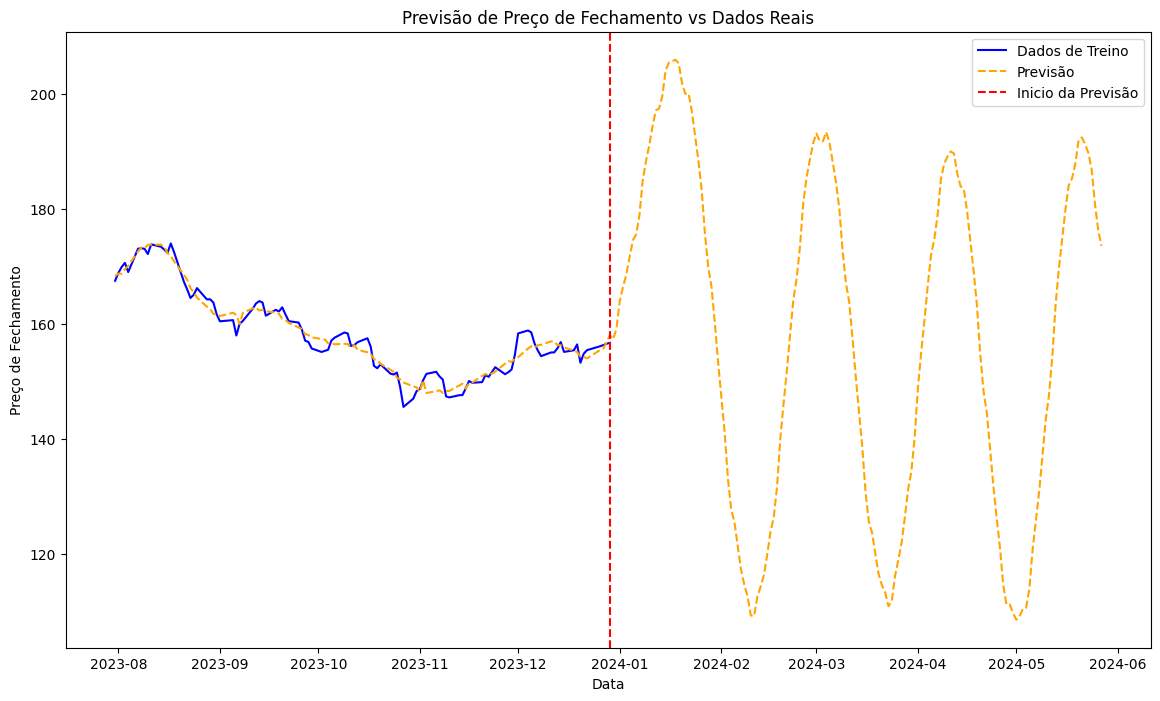

In [24]:



plt.figure(figsize=(14, 8))
plt.plot (dados_treino ['Date'], dados_treino ['Close'], label= 'Dados de Treino', color ='blue')
plt.plot (previsao['ds'], previsao['yhat'], label= 'Previsão', color ='orange', linestyle='--')

plt.axvline (dados_treino ['Date'].max(), color = 'red', linestyle = '--', label= 'Inicio da Previsão')
plt.xlabel ('Data')
plt.ylabel ('Preço de Fechamento')
plt.title ('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend ()
plt.show ()